<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-4df13306bf58>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
# Basic Libraries

import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Libraries
import statsmodels.api as sm
import scipy.stats

# Set Display Options
%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)
pd.set_option('display.max_columns',None)
pd.set_option('display.width', 1000)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load the dataset into a pandas dataframe
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.drop(columns='Unnamed: 0', inplace=True)
boston_df.info()
boston_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


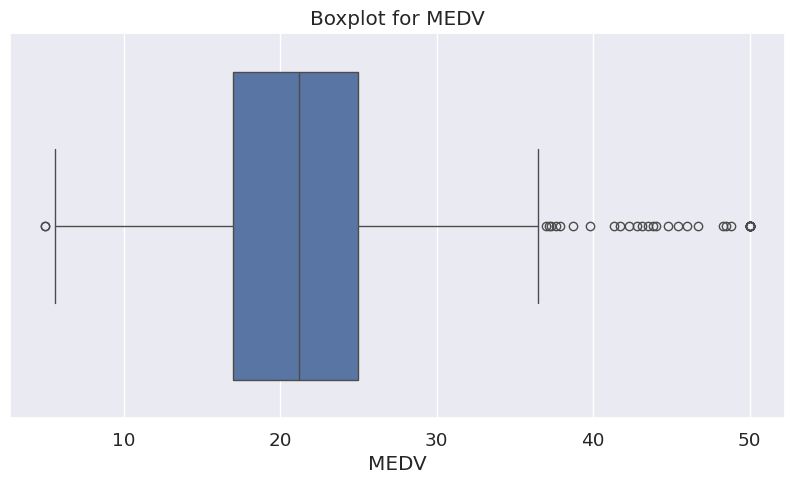

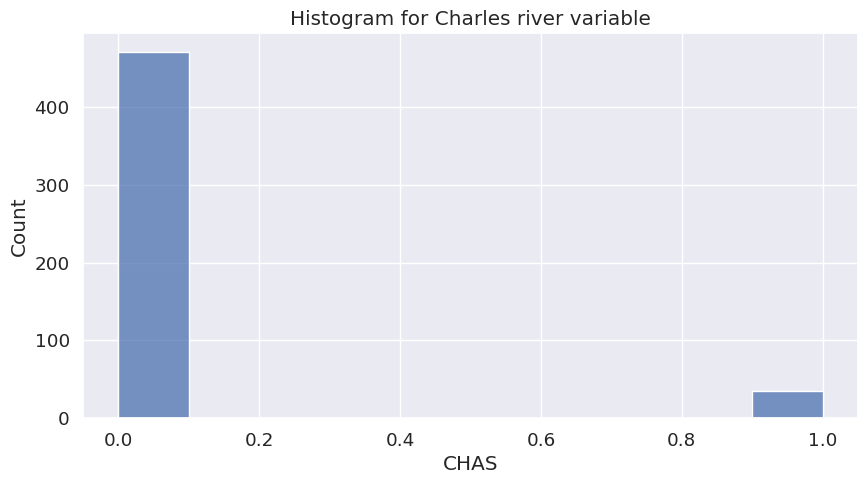

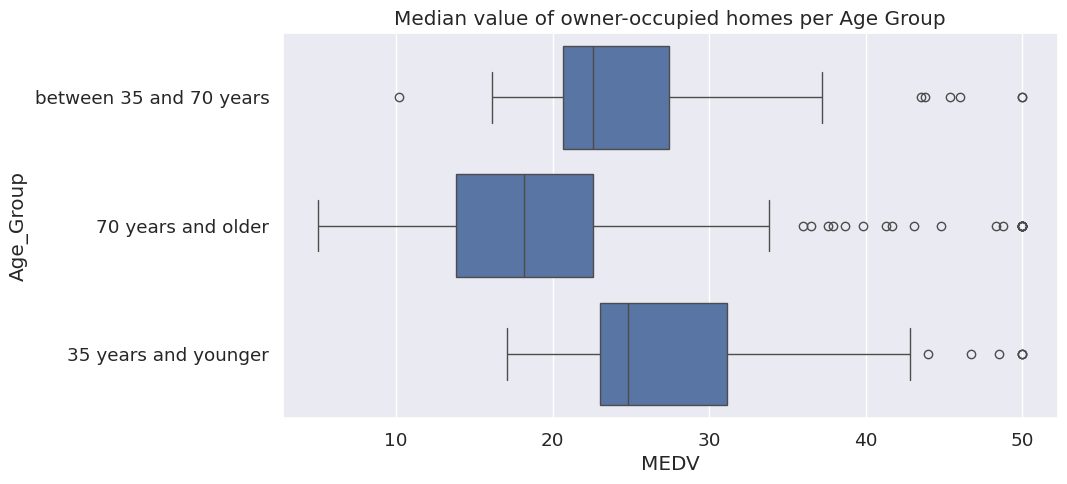

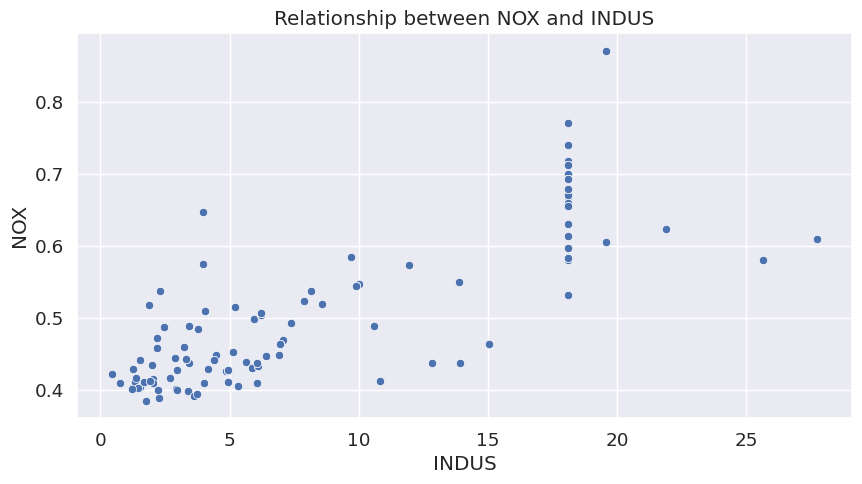

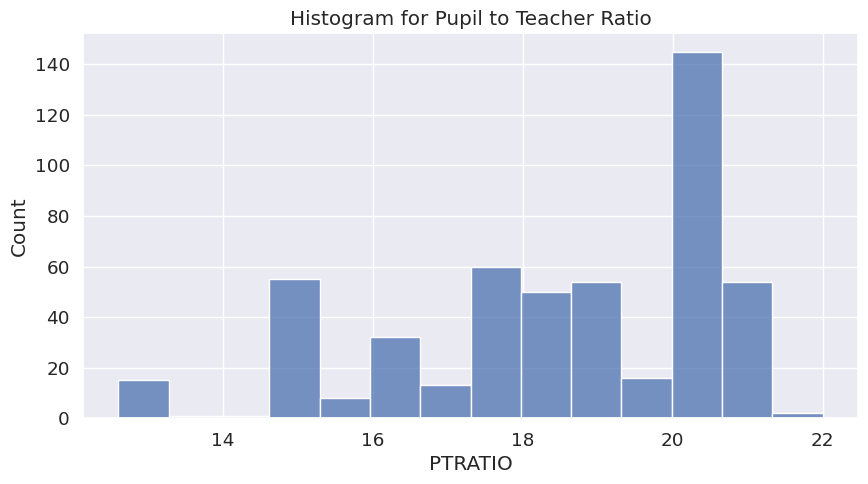

In [8]:
# Boxplot for the Median value of owner-occupied homes
plt.figure(figsize=(10,5))
sns.boxplot(data= boston_df, x='MEDV')
plt.title("Boxplot for MEDV")
plt.show()

# Bar plot for the Charles river variable
plt.figure(figsize=(10,5))
sns.histplot(data=boston_df, x='CHAS',kde=False)
plt.title("Histogram for Charles river variable")
plt.show()

# Discretization of Age variable
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

# Visualization of the MEDV vs. Age
plt.figure(figsize=(10,5))
sns.boxplot(data = boston_df, x = 'MEDV', y = 'Age_Group')
plt.title('Median value of owner-occupied homes per Age Group')
plt.show()

# Scatter plot to show relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
plt.figure(figsize=(10,5))
sns.scatterplot(data = boston_df, x = 'INDUS', y = 'NOX')
plt.title('Relationship between NOX and INDUS')
plt.show()

# Histogram for the pupil to teacher ratio variable
plt.figure(figsize=(10,5))
sns.histplot(data= boston_df, x='PTRATIO', kde=False)
plt.title("Histogram for Pupil to Teacher Ratio")
plt.show()

In [9]:
# T-test statistics for independent samples
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'])

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [10]:
#Conclusion: Since the p-value (7.390623170519905e-05) is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river.

In [11]:
# ANOVA Test statistics
thirtyfive_lower = boston_df[boston_df['Age_Group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_Group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['Age_Group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F-Statistic={0}, P-value={1}".format(f_statistic,p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


In [12]:
# Conclusion: Since the p-value (1.7105011022702984e-15) is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

In [13]:
# Pearson Correlation Test statistics
pearson_coef, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Pearson Coefficient: {0}, P-Value: {1}".format(pearson_coef,p_value))

Pearson Coefficient: 0.7636514469209192, P-Value: 7.913361061210442e-98


In [14]:
#Conclusion: Since the p-value (7.91336106123955e-98) is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.